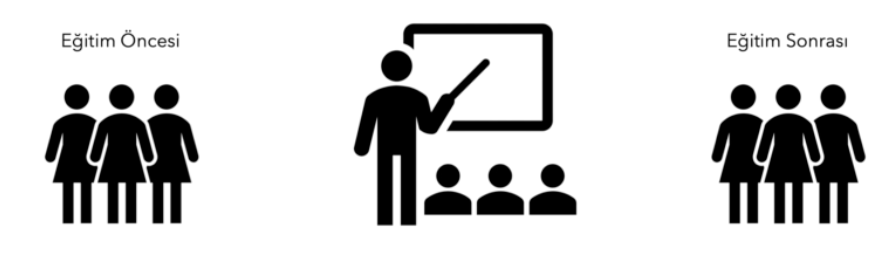

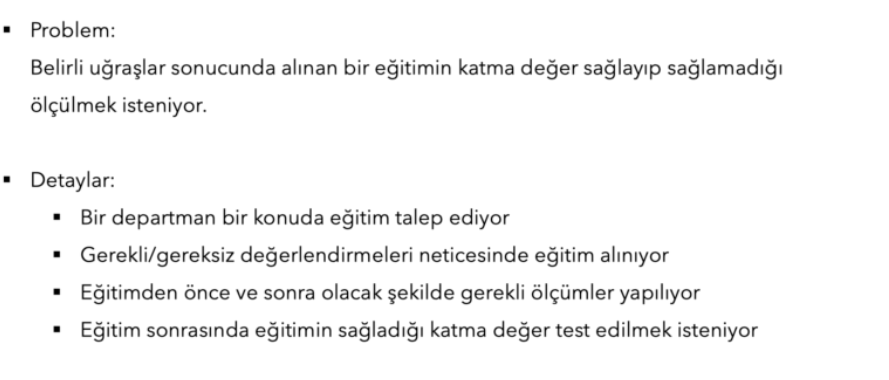

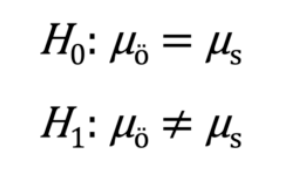

In [1]:
import pandas as pd
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [2]:
before[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [3]:
import numpy as np

In [4]:
#First dataset
AYRIK = pd.concat([before, after], axis = 1)
AYRIK.columns = ["before","after"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#Second dataset
#before FLAG/TAG'INI OLUSTURMA
GRUP_before = np.arange(len(before))
GRUP_before = pd.DataFrame(GRUP_before)
GRUP_before[:] = "before"
#FLAG VE before DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([before, GRUP_before], axis = 1)
#after FLAG/TAG'INI OLUSTURMA
GRUP_after = np.arange(len(after))
GRUP_after = pd.DataFrame(GRUP_after)
GRUP_after[:] = "after"

#FLAG VE after DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([after, GRUP_after], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","before_after"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     before  after
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS before_after
0         123       before
1         119       before
2         119       before
3         116       before
4         123       before 



In [5]:
import seaborn as sns

<Axes: xlabel='before_after', ylabel='PERFORMANS'>

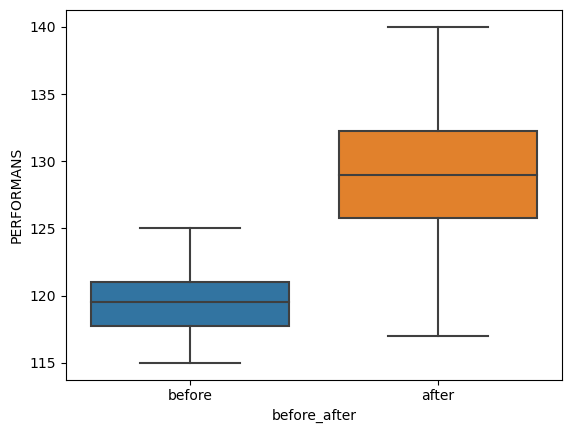

In [6]:
sns.boxplot(x = "before_after", y = "PERFORMANS", data = BIRLIKTE)

In [7]:
# Varsayım kontrolü

In [8]:
from scipy.stats import shapiro

In [9]:
shapiro(AYRIK.before) # h0 reddedilmez. Normal dağılım varsayımı sağlanmaktadır.

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722007602453232)

In [10]:
shapiro(AYRIK.after) # h0 reddedilmez. Normal dağılım varsayımı sağlanmaktadır.

ShapiroResult(statistic=0.9780091047286987, pvalue=0.6159570813179016)

In [11]:
import scipy.stats as stats
stats.levene(AYRIK.before,AYRIK.after)
# pvalue<0   h0 reddedilir ve varyansların homojenliği sağlanmaz.
# ancak görmezden gelicez.

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [12]:
# Hipotez Testi
stats.ttest_rel(AYRIK.before, AYRIK.after)
# p value < 00.5 , h0 reddedilir. İki grup arasında istatistiksel olarak anlamlı bir fark vardır.

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440796e-11, df=39)

In [13]:
# Nonparametrik Bağımlı İki Örneklem Testi

In [14]:
# varyanslar homojen olmadığı için nonparametrik test yapılmalıdır

In [15]:
stats.wilcoxon(AYRIK.before, AYRIK.after)

/Users/alihan/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [16]:
# İki grup arasında istatistiksel olarak anlamlı bir fark vardır.